In [37]:
import numpy as np
import pandas as pd
import finance_toolkit as fin

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
hfi = pd.read_csv("data/edhec-hedgefundindices.csv",
                      header=0, index_col=0, parse_dates=True)
hfi = hfi/100
hfi.index = hfi.index.to_period('M')

hfi.head()

C:\Users\pedro\AppData\Local\Temp\ipykernel_12204\3423862689.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hfi = pd.read_csv("data/edhec-hedgefundindices.csv",


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


## semi deviation

In [3]:
def semi_deviation(ret):
    return ret.loc[ret<0].std()

In [4]:
semi_deviation(hfi['Global Macro'])

0.006612235433326808

In [5]:
hfi.aggregate(semi_deviation)

Convertible Arbitrage     0.019687
CTA Global                0.012495
Distressed Securities     0.015288
Emerging Markets          0.028197
Equity Market Neutral     0.009667
Event Driven              0.015536
Fixed Income Arbitrage    0.017940
Global Macro              0.006612
Long/Short Equity         0.014133
Merger Arbitrage          0.008954
Relative Value            0.012355
Short Selling             0.027377
Funds Of Funds            0.012191
dtype: float64

In [6]:
def semi_deviation(ret):
    if type(ret) == pd.Series:
        return ret.loc[ret<0].std()
    if type(ret) == pd.DataFrame:
        return ret.aggregate(semi_deviation)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")


In [7]:
semi_deviation(hfi['Global Macro'])

0.006612235433326808

In [8]:
semi_deviation(hfi)

Convertible Arbitrage     0.019687
CTA Global                0.012495
Distressed Securities     0.015288
Emerging Markets          0.028197
Equity Market Neutral     0.009667
Event Driven              0.015536
Fixed Income Arbitrage    0.017940
Global Macro              0.006612
Long/Short Equity         0.014133
Merger Arbitrage          0.008954
Relative Value            0.012355
Short Selling             0.027377
Funds Of Funds            0.012191
dtype: float64

In [9]:
semi_deviation(3)

TypeError: Expected r to be a Series or DataFrame

In [10]:
-np.percentile(hfi, 5)

0.0274

## VaR historico

In [11]:
-np.percentile(hfi['Global Macro'], 5)

0.01499

In [12]:
-np.percentile(hfi, 5)

0.0274

In [13]:
hfi.aggregate(lambda x: -np.percentile(x, 5))

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [14]:
def var_historic(r, level=5):
    if isinstance(r, pd.Series):
        return -np.percentile(r, level)
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

In [15]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

## CVar historico

In [16]:
is_beyond = hfi['Global Macro'] <= -var_historic(hfi['Global Macro'])
-hfi['Global Macro'][is_beyond].mean()

0.02062857142857143

In [17]:
def cvar_historic(r, level=5):
    """
    Computes the Conditional VaR of Series or DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level)
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")


In [18]:
cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

## VaR gausseano

In [19]:
from scipy.stats import norm
def var_gaussian(r, level=5):
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    return -(r.mean() + z*r.std(ddof=0))

In [20]:
hfi.aggregate(var_gaussian)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

## Normalidade

In [21]:
import scipy.stats
def is_normal(r, level=0.01):
    statistic, p_value = scipy.stats.jarque_bera(r)
    return p_value > level

In [22]:
hfi.aggregate(is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

$$
S = \frac{E[(X-\mu)]^3}{\sigma^3}
$$

$$
K = \frac{E[(X-\mu)]^4}{\sigma^4}
$$

In [23]:
def skewness(r):
    demeaned_r = r - r.mean()
    sigma_r = r.std()
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3


def kurtosis(r):
    demeaned_r = r - r.mean()
    sigma_r = r.std()
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

In [24]:
hfi.aggregate(skewness)

Convertible Arbitrage    -2.624552
CTA Global                0.172709
Distressed Securities    -1.293430
Emerging Markets         -1.160418
Equity Market Neutral    -2.112330
Event Driven             -1.401124
Fixed Income Arbitrage   -3.917868
Global Macro              0.977321
Long/Short Equity        -0.388003
Merger Arbitrage         -1.312562
Relative Value           -1.805125
Short Selling             0.763599
Funds Of Funds           -0.359722
dtype: float64

In [25]:
hfi.aggregate(kurtosis)

Convertible Arbitrage     23.104130
CTA Global                 2.930547
Distressed Securities      7.830098
Emerging Markets           9.180574
Equity Market Neutral     17.087865
Event Driven               7.974835
Fixed Income Arbitrage    29.615694
Global Macro               5.698099
Long/Short Equity          4.489556
Merger Arbitrage           8.672620
Relative Value            12.029207
Short Selling              6.071337
Funds Of Funds             7.016490
dtype: float64

Cornish-Fisher modifier
$$ z_{cornishfisher} = z +\frac{1}{6}(z^2-1)S + \frac{1}{24}(z^3-3z)(K-3)-\frac{1}{36}(2z^3-5z)S^2 $$

In [26]:
from scipy.stats import norm
def var_gaussian(r, level=5, modified=False):
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
        
    return -(r.mean() + z*r.std(ddof=0))

In [27]:
hfi.aggregate(var_gaussian, modified=True)

Convertible Arbitrage     0.025179
CTA Global                0.033111
Distressed Securities     0.025093
Emerging Markets          0.053005
Equity Market Neutral     0.010735
Event Driven              0.025506
Fixed Income Arbitrage    0.017899
Global Macro              0.013621
Long/Short Equity         0.027937
Merger Arbitrage          0.012608
Relative Value            0.016153
Short Selling             0.066267
Funds Of Funds            0.021584
dtype: float64

In [28]:
var_table = [var_gaussian(hfi), 
             var_gaussian(hfi, modified=True), 
             var_historic(hfi)]
comparison = pd.concat(var_table, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']


<Axes: >

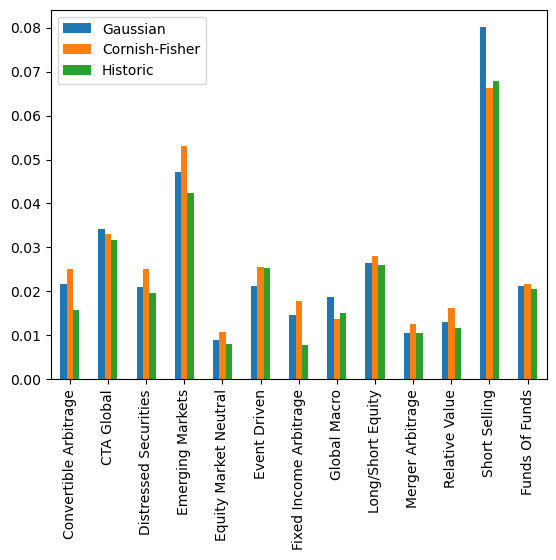

In [29]:
comparison.plot.bar()

## Resumo stats

In [32]:
def summary_stats(r, riskfree_rate=0.03):
    """
    Return a DataFrame that contains aggregated summary stats for the returns in the columns of r
    """
    ann_r = r.aggregate(fin.annualize_return, periods_per_year=12)
    ann_vol = r.aggregate(fin.annualize_vol, periods_per_year=12)
    ann_sr = r.aggregate(fin.sharpe_ratio, riskfree_rate=riskfree_rate, periods_per_year=12)
    dd = r.aggregate(lambda r: fin.drawdown(r))
    skew = r.aggregate(skewness)
    kurt = r.aggregate(kurtosis)
    cf_var5 = r.aggregate(var_gaussian, modified=True)
    hist_cvar5 = r.aggregate(cvar_historic)
    return pd.DataFrame({
        "Annualized Return": ann_r,
        "Annualized Vol": ann_vol,
        "Skewness": skew,
        "Kurtosis": kurt,
        "Cornish-Fisher VaR (5%)": cf_var5,
        "Historic CVaR (5%)": hist_cvar5,
        "Sharpe Ratio": ann_sr,
        "Max Drawdown": dd
    })

In [41]:
summary_stats(hfi).sort_values(by='Sharpe Ratio', ascending=False)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Merger Arbitrage,0.065610,0.033320,-1.312562,8.672620,0.012608,0.019143,1.040139,-0.056342
Relative Value,0.070915,0.039781,-1.805125,12.029207,0.016153,0.024650,1.000992,-0.159407
Distressed Securities,0.084723,0.059034,-1.293430,7.830098,0.025093,0.036429,0.902173,-0.229233
Equity Market Neutral,0.054915,0.028164,-2.112330,17.087865,0.010735,0.016879,0.860965,-0.110823
Event Driven,0.077034,0.058001,-1.401124,7.974835,0.025506,0.038336,0.789200,-0.200817
Global Macro,0.065444,0.050999,0.977321,5.698099,0.013621,0.020629,0.676388,-0.079229
Long/Short Equity,0.076129,0.069056,-0.388003,4.489556,0.027937,0.041943,0.650079,-0.218197
Convertible Arbitrage,0.066352,0.057391,-2.624552,23.104130,0.025179,0.036550,0.616425,-0.292688
Fixed Income Arbitrage,0.052799,0.039972,-3.917868,29.615694,0.017899,0.028257,0.555074,-0.178793
Funds Of Funds,0.050848,0.053921,-0.359722,7.016490,0.021584,0.033207,0.376234,-0.205914
